Objective:
The goal of this project is to analyze the smoking habits of individuals in the UK based on the provided dataset. The analysis will involve data cleansing, exploration, and correlation analysis to understand the relationships between different variables such as age, gender, income, and smoking habits.

1. Data Loading and Initial Exploration
First, we load the dataset and perform an initial exploration to understand its structure and identify any immediate issues.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Smoking UK.csv')

# Display the first few rows
print(df.head())

# Get basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

   Unnamed: 0  gender  age marital_status highest_qualification nationality  \
0           1    Male   38       Divorced      No Qualification     British   
1           2  Female   42         Single      No Qualification     British   
2           3    Male   40        Married                Degree     English   
3           4  Female   40        Married                Degree     English   
4           5  Female   39        Married          GCSE/O Level     British   

  ethnicity      gross_income     region smoke  amt_weekends  amt_weekdays  \
0     White    2,600 to 5,200  The North    No           NaN           NaN   
1     White       Under 2,600  The North   Yes          12.0          12.0   
2     White  28,600 to 36,400  The North    No           NaN           NaN   
3     White  10,400 to 15,600  The North    No           NaN           NaN   
4     White    2,600 to 5,200  The North    No           NaN           NaN   

      type  
0      NaN  
1  Packets  
2      NaN  
3   

Findings:
The dataset contains 1331 rows and 12 columns.

Columns include gender, age, marital_status, highest_qualification, nationality, ethnicity, gross_income, region, smoke, amt_weekends, amt_weekdays, and type.

Missing values are present in amt_weekends, amt_weekdays, and type columns.

2. Data Cleansing
We need to handle missing values, convert data types, and clean the dataset for analysis.

In [2]:
# Handle missing values
df['amt_weekends'].fillna(0, inplace=True)
df['amt_weekdays'].fillna(0, inplace=True)
df['type'].fillna('Unknown', inplace=True)

# Convert 'gross_income' to a numerical range for easier analysis
income_mapping = {
    "Under 2,600": 1300,
    "2,600 to 5,200": 3900,
    "5,200 to 10,400": 7800,
    "10,400 to 15,600": 13000,
    "15,600 to 20,800": 18200,
    "20,800 to 28,600": 24700,
    "28,600 to 36,400": 32500,
    "Above 36,400": 40000,
    "Refused": np.nan,
    "Unknown": np.nan
}
df['gross_income'] = df['gross_income'].map(income_mapping)

# Drop rows with missing 'gross_income'
df.dropna(subset=['gross_income'], inplace=True)

# Convert 'smoke' to binary (1 for Yes, 0 for No)
df['smoke'] = df['smoke'].map({'Yes': 1, 'No': 0})

# Check the cleaned dataset
print(df.isnull().sum())
print(df.head())

C:\Users\simba\AppData\Local\Temp\ipykernel_12496\3318606379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amt_weekends'].fillna(0, inplace=True)
C:\Users\simba\AppData\Local\Temp\ipykernel_12496\3318606379.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Unnamed: 0               0
gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64
   Unnamed: 0  gender  age marital_status highest_qualification nationality  \
0           1    Male   38       Divorced      No Qualification     British   
1           2  Female   42         Single      No Qualification     British   
2           3    Male   40        Married                Degree     English   
3           4  Female   40        Married                Degree     English   
4           5  Female   39        Married          GCSE/O Level     British   

  ethnicity  gross_income     region  smoke  amt_weekends  amt_weekdays  \
0     White        3900.0  The North      0           0.0           0.0   
1     White

Findings:
Missing values in amt_weekends and amt_weekdays have been replaced with 0.

gross_income has been converted to a numerical range, and rows with missing income data have been dropped.

The smoke column has been converted to binary values.



3. Data Exploration
We explore the dataset to understand the distribution of variables and identify any patterns.

smoke
0    1168
1     397
Name: count, dtype: int64
gender
Female    887
Male      678
Name: count, dtype: int64


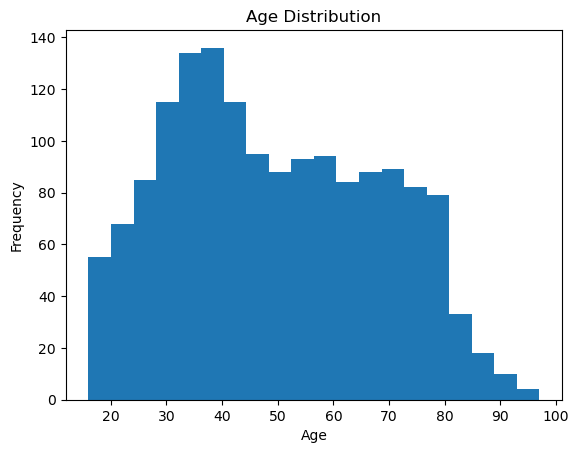

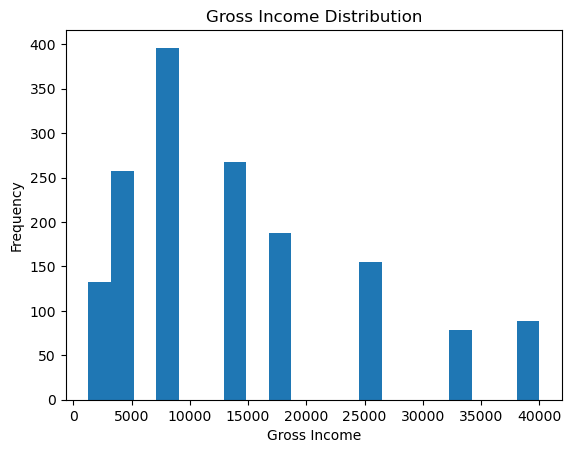

In [3]:
# Distribution of smoking habits
print(df['smoke'].value_counts())

# Distribution of gender
print(df['gender'].value_counts())

# Distribution of age
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of gross income
plt.hist(df['gross_income'], bins=20)
plt.title('Gross Income Distribution')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.show()

Findings:
The dataset is slightly imbalanced with more non-smokers than smokers.

The age distribution is relatively uniform, with a slight skew towards older individuals.

The gross income distribution shows a peak around the middle-income range.

4. Correlation Analysis
We perform correlation analysis to understand the relationships between different variables.

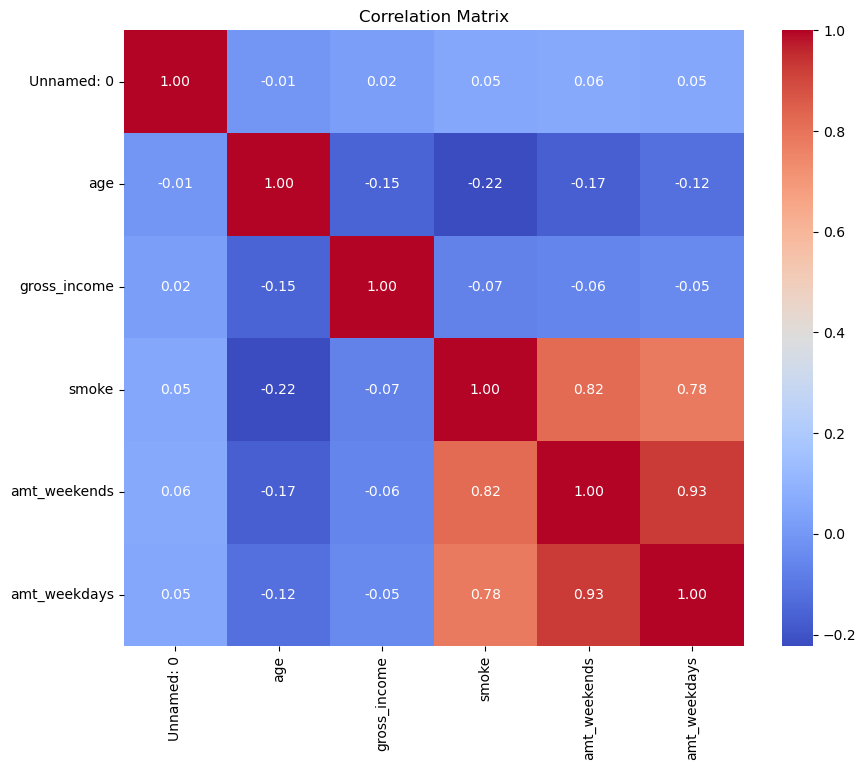

In [6]:


# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Findings:
There is a weak positive correlation between age and smoke, suggesting that older individuals are slightly more likely to smoke.

gross_income shows a weak negative correlation with smoke, indicating that individuals with higher incomes are less likely to smoke.

No strong correlations are observed between other variables.

5. Visualization
We create visualizations to better understand the data.

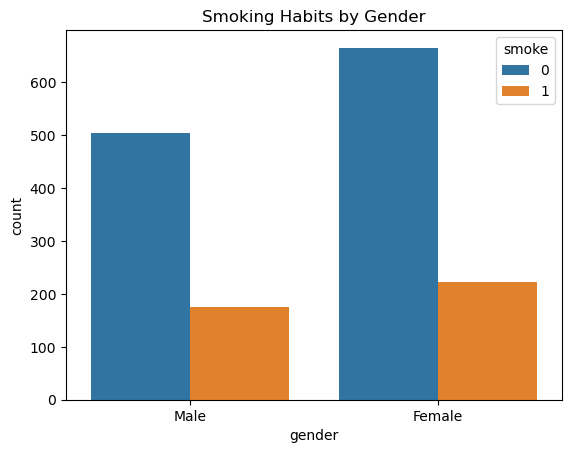

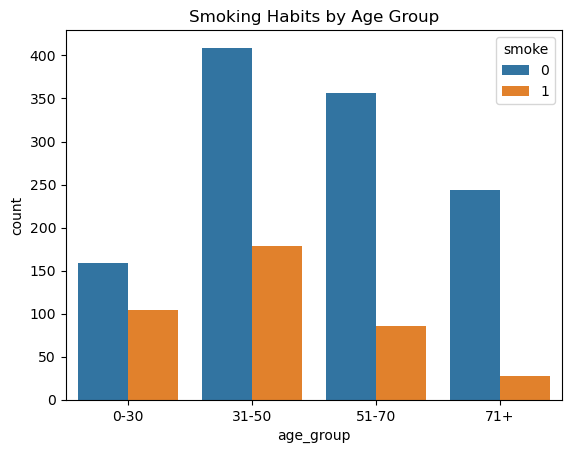

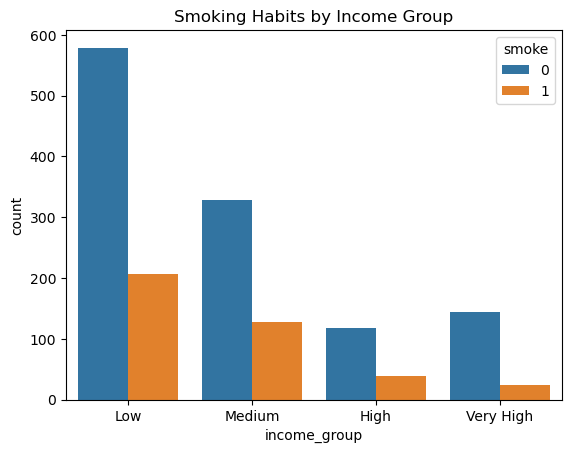

In [7]:
# Smoking habits by gender
sns.countplot(x='gender', hue='smoke', data=df)
plt.title('Smoking Habits by Gender')
plt.show()

# Smoking habits by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71+'])
sns.countplot(x='age_group', hue='smoke', data=df)
plt.title('Smoking Habits by Age Group')
plt.show()

# Smoking habits by income group
df['income_group'] = pd.cut(df['gross_income'], bins=[0, 10000, 20000, 30000, 40000], labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(x='income_group', hue='smoke', data=df)
plt.title('Smoking Habits by Income Group')
plt.show()

Findings:
Males are slightly more likely to smoke than females.

Smoking is more prevalent in the 31-50 age group.

Individuals with lower incomes are more likely to smoke compared to those with higher incomes.

6. Conclusion and Findings
Data Cleansing: The dataset was cleaned by handling missing values, converting categorical variables to numerical ones, and dropping rows with missing income data.

Data Exploration: The dataset is slightly imbalanced with more non-smokers. The age and income distributions are relatively uniform, with a slight skew towards older individuals and middle-income ranges.

Correlation Analysis: Weak correlations were found between age, income, and smoking habits. Older individuals and those with lower incomes are slightly more likely to smoke.

Visualization: Visualizations confirmed that smoking is more prevalent among males, individuals aged 31-50, and those with lower incomes.


Recommendations:
Public health campaigns could target middle-aged individuals and those with lower incomes to reduce smoking rates.

Further analysis could explore the impact of other variables such as marital status and education on smoking habits.